In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("../data/learning_data.csv")

## **Wstępna analiza**

**INFO** \
This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.

In [32]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran West Side,Co-op for sale,415000,3,1.0,2184.207862,233 E 70th St Apt 6R,"New York, NY 10021","233 E 70th St Apt 6RNew York, NY 10021",New York,New York County,New York,Manhattan,233,"233 E 70th St #6r, New York, NY 10021, USA",40.767820,-73.959425
1,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,5,5.0,2184.207862,42-11 Astoria Blvd N,"Astoria, NY 11105","42-11 Astoria Blvd NAstoria, NY 11105",United States,New York,Queens County,Queens,Astoria Boulevard North,"42-11 Astoria Blvd N, Astoria, NY 11105, USA",40.769148,-73.907370
2,Brokered by EXP Realty,Condo for sale,675000,2,2.0,904.000000,92-29 Queens Blvd Unit 7H116,"Rego Park, NY 11374","92-29 Queens Blvd Unit 7H116Rego Park, NY 11374",United States,New York,Queens County,Queens,Queens Boulevard,"92-29 Queens Blvd, Rego Park, NY 11374, USA",40.732471,-73.867080
3,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,3,2.0,1696.000000,213 Liberty Ave,"Staten Island, NY 10305","213 Liberty AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Liberty Avenue,"213 Liberty Ave, Staten Island, NY 10305, USA",40.587072,-74.094436
4,Brokered by COMPASS,Co-op for sale,825000,2,1.0,2184.207862,250 W 103rd St Apt 7D,"Manhattan, NY 10025","250 W 103rd St Apt 7DManhattan, NY 10025",New York,New York County,New York,Manhattan,250,"250 W 103rd St Apt 7b, New York, NY 10025, USA",40.799157,-73.969032


In [33]:
# rozmiar ramki
df.shape

(3360, 17)

In [34]:
df_learning = df.copy()

### Opis Kolumn
- BROKERTITLE: Title of the broker
- TYPE: Type of the house
- PRICE: Price of the house
- BEDS: Number of bedrooms
- BATH: Number of bathrooms
- PROPERTYSQFT: Square footage of the property
- ADDRESS: Full address of the house
- STATE: State of the house
- MAIN_ADDRESS: Main address information
- ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
- LOCALITY: Locality information
- SUBLOCALITY: Sublocality information
- STREET_NAME: Street name
- LONG_NAME: Long name
- FORMATTED_ADDRESS: Formatted address
- LATITUDE: Latitude coordinate of the house
- LONGITUDE: Longitude coordinate of the house

In [35]:
df_learning.info()
# brak wartosci null w kazdej kolumnie ramki danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3360 non-null   object 
 1   TYPE                         3360 non-null   object 
 2   PRICE                        3360 non-null   int64  
 3   BEDS                         3360 non-null   int64  
 4   BATH                         3360 non-null   float64
 5   PROPERTYSQFT                 3360 non-null   float64
 6   ADDRESS                      3360 non-null   object 
 7   STATE                        3360 non-null   object 
 8   MAIN_ADDRESS                 3360 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  3360 non-null   object 
 10  LOCALITY                     3360 non-null   object 
 11  SUBLOCALITY                  3360 non-null   object 
 12  STREET_NAME                  3360 non-null   object 
 13  LONG_NAME         

In [36]:
#usuwamy wiersze duplikujące się
df_learning.duplicated().sum()

97

In [37]:
df_learning.drop_duplicates(inplace=True)
df_learning.duplicated().sum()

0

In [38]:
df_learning.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3.263000e+03,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,2.590800e+06,3.365002,2.383354,2164.750544,40.714486,-73.941463
std,3.790886e+07,2.666887,2.007188,2157.626790,0.087371,0.100577
min,2.494000e+03,1.000000,0.000000,250.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.641194,-73.987120
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.727192,-73.948795
75%,1.500000e+06,4.000000,3.000000,2184.207862,40.771405,-73.870703
max,2.147484e+09,50.000000,50.000000,55300.000000,40.912729,-73.703904


array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>],
       [<Axes: title={'center': 'BATH'}>,
        <Axes: title={'center': 'PROPERTYSQFT'}>],
       [<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>]], dtype=object)

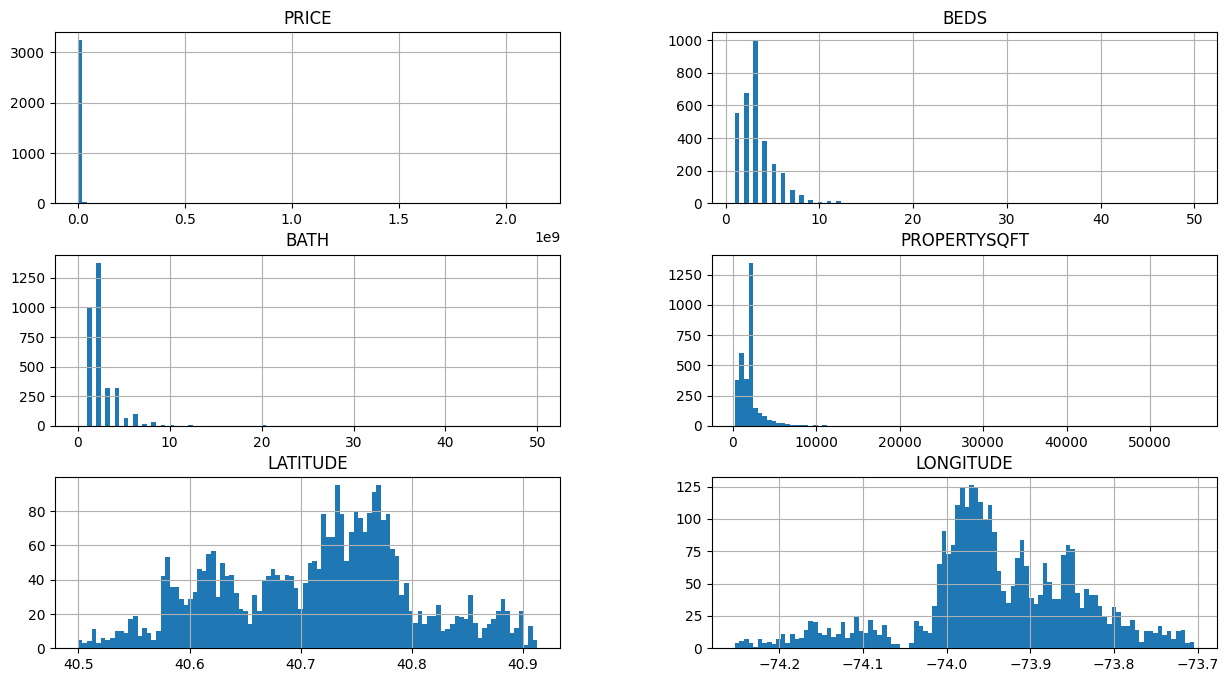

In [39]:
# rozkład zmiennych numerycznych 
df_learning.hist(bins=100, figsize=(15,8))

array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

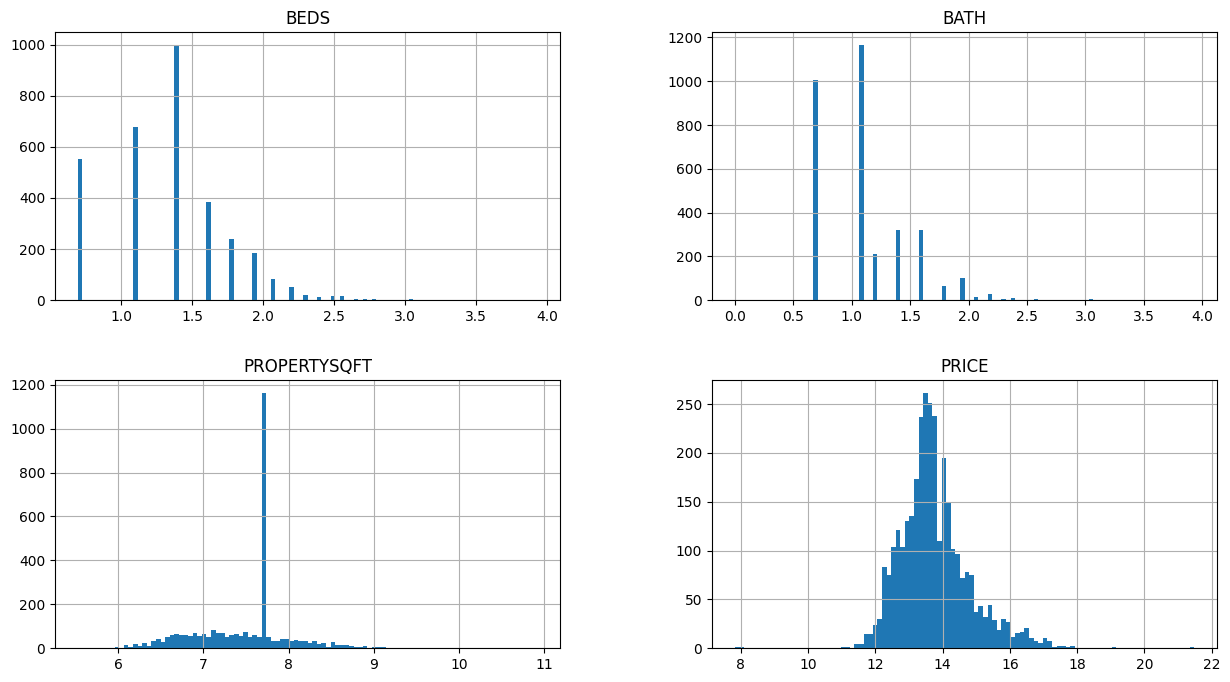

In [40]:
# sprawdzmy rozkłady najważniejszych dla nas zmiennych numerycznych, z przeskalowaniem logarytmicznym (naturalnym zwiększonym o 1)
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

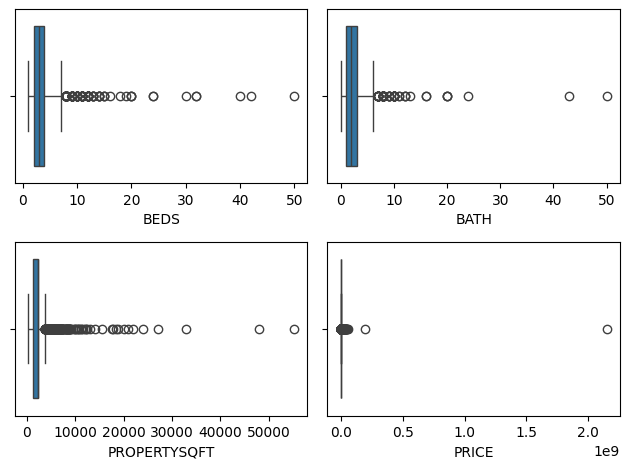

In [41]:
# analiza jako boxploty
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    #sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    sns.boxplot(df_num, x= df_num[col], ax= axes[i])
plt.tight_layout() 
plt.show()

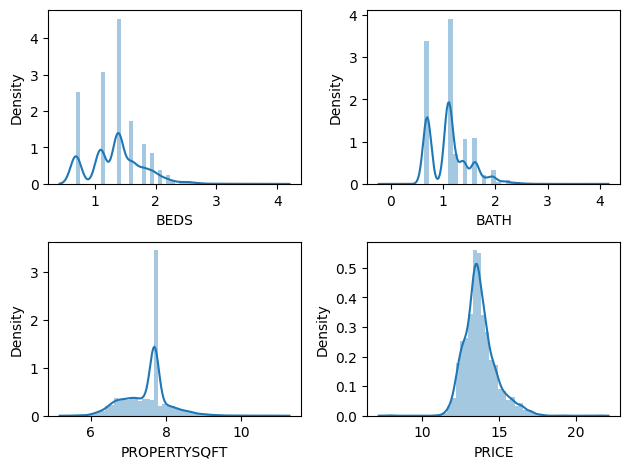

In [42]:
# jako gęstości
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.distplot(np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

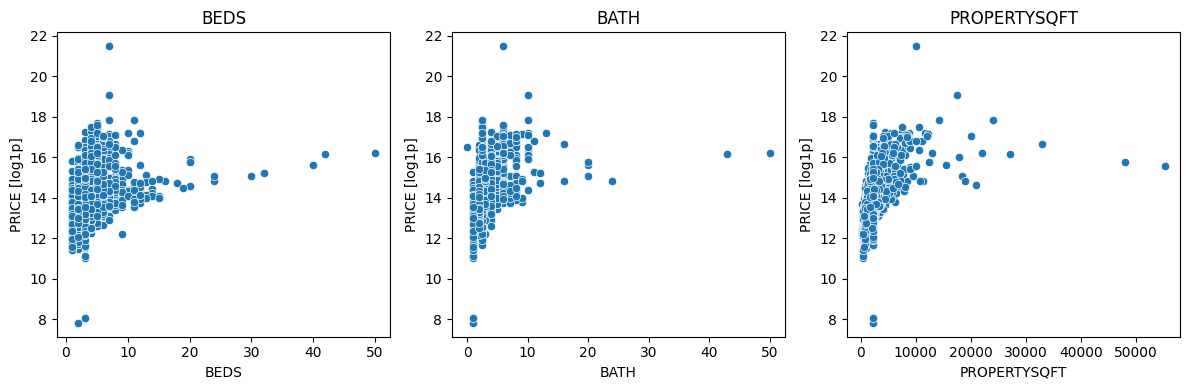

In [43]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log1p(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("PRICE [log1p]")

plt.tight_layout()
plt.show()

<Axes: >

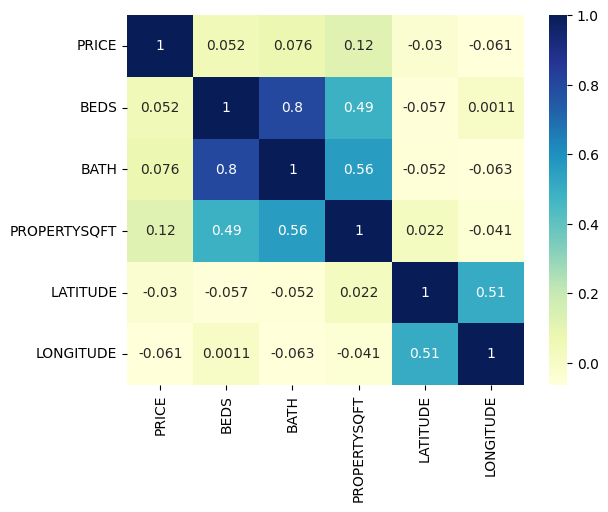

In [44]:
# korelacja danych numerycznych
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

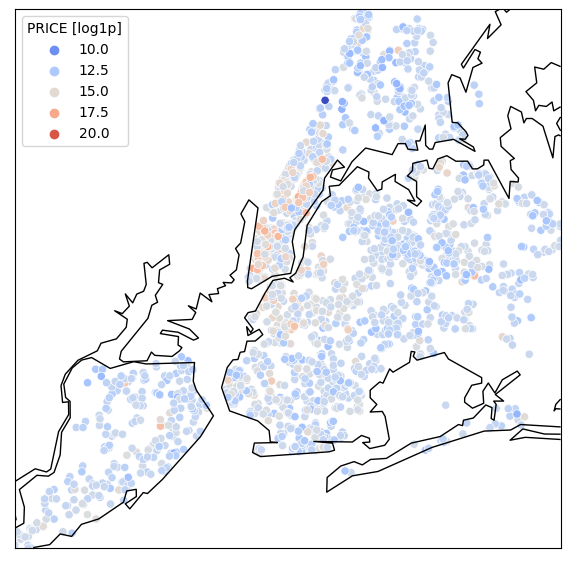

In [52]:
# TO mi nie działa idk co tam jest
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()

In [45]:
cat_col = [col for col in df_learning.columns if df_learning[col].dtype == 'object']
df_learning[cat_col].nunique()
# widać ze kolumny Address, Main_Address, Long_Name i Formatted_Address mają bardzo dużo unikalnych obserwacji, co przy zmiennych kategorycznych
# moze nie działać najlepiej na model = pomijalne


BROKERTITLE                     859
TYPE                             13
ADDRESS                        3260
STATE                           288
MAIN_ADDRESS                   3261
ADMINISTRATIVE_AREA_LEVEL_2      26
LOCALITY                         11
SUBLOCALITY                      17
STREET_NAME                     158
LONG_NAME                      2150
FORMATTED_ADDRESS              3242
dtype: int64

In [46]:
df_learning = df_learning.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis = 1)

In [47]:
#sprawdzamy rozkład wartości w zmiennych kategorycznych
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                                             297
Brokered by Douglas Elliman - 575 Madison Ave                    84
Brokered by Brown Harris Stevens                                 67
Brokered by Corcoran East Side                                   63
Brokered by RE MAX Edge                                          54
                                                               ... 
Brokered by Island Advantage Realty LLC                           1
Brokered by Sweet Key Realty Group Inc                            1
Brokered by Stone Hill Real Estate                                1
Brokered by Dove Real Estate Corp.                                1
Brokered by Rising Star Realty and Property Management, Inc.      1
Name: BROKERTITLE, Length: 859, dtype: int64

________________________________________________________________
Co-op for sale                973
House for sale                694
Condo for sale                615
Multi-family home for sale    487
Townh

In [48]:
# to samo, ale plus MEAN_PRICE dla kazdej kategorii
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    
    df_median = df_learning[[col, "PRICE"]]
    df_median = pd.DataFrame(df_median.groupby(col)["PRICE"].median()).reset_index()
    df_median.columns = [col, "PRICE_MEDIAN"]
    
    df_std = df_learning[[col, "PRICE"]]
    df_std = pd.DataFrame(df_std.groupby(col)["PRICE"].std()).reset_index()
    df_std.columns = [col, "PRICE_STD"]
    
    df_max = df_learning[[col, "PRICE"]]
    df_max = pd.DataFrame(df_max.groupby(col)["PRICE"].max()).reset_index()
    df_max.columns = [col, "PRICE_MAX"]
    
    df_min = df_learning[[col, "PRICE"]]
    df_min = pd.DataFrame(df_min.groupby(col)["PRICE"].min()).reset_index()
    df_min.columns = [col, "PRICE_MIN"]
    
    df_q1 = df_learning[[col, "PRICE"]]
    df_q1 = pd.DataFrame(df_q1.groupby(col)["PRICE"].quantile(0.25)).reset_index()
    df_q1.columns = [col, "PRICE_Q1"]
    
    df_q2 = df_learning[[col, "PRICE"]]
    df_q2 = pd.DataFrame(df_q2.groupby(col)["PRICE"].quantile(0.75)).reset_index()
    df_q2.columns = [col, "PRICE_Q2"]
    
    
    df_tmp = pd.merge(df_count, df_tmp, on= col)
    df_tmp = pd.merge(df_tmp, df_median, on= col)
    df_tmp = pd.merge(df_tmp, df_std, on= col)
    df_tmp = pd.merge(df_tmp, df_max, on= col)
    df_tmp = pd.merge(df_tmp, df_min, on= col)
    df_tmp = pd.merge(df_tmp, df_q1, on= col)
    df_tmp = pd.merge(df_tmp, df_q2, on= col).sort_values("count", ascending=False).reset_index(drop= True)
    
    df_tmp = df_tmp.applymap(lambda x: '{:,.0f}'.format(x) if not isinstance(x, str) else x)
    
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                           BROKERTITLE count MEAN_PRICE  \
0                                  Brokered by COMPASS   297  2,711,090   
1        Brokered by Douglas Elliman - 575 Madison Ave    84  5,321,696   
2                     Brokered by Brown Harris Stevens    67  2,300,254   
3                       Brokered by Corcoran East Side    63  6,883,740   
4                              Brokered by RE MAX Edge    54  1,020,550   
..                                                 ...   ...        ...   
854               Brokered by Century 21 Zaloom Realty     1    699,900   
855     Brokered by Platinum Properties of Long Island     1    329,000   
856                       Brokered by Tyme Realty Corp     1  1,100,000   
857                  Brokered by Tiffany Moves You Inc     1  2,480,000   
858  Brokered by Rising Star Realty and Property Ma...     1    735,000   

    PRICE_MEDIAN  PRICE_STD   PRICE_MAX  PRICE_MIN   PRICE_Q1   PRICE_Q2  
0      1,325,000  4,082,

## **Eksperymentowanie z outlierami**

In [57]:
# usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 sigm)
print(f'Przed: { df_learning.shape[0]}')
df_learning['PRICE_LOG'] = np.log1p(df_learning['PRICE'])
mean_pr = df_learning['PRICE_LOG'].median()
std_pr = df_learning['PRICE_LOG'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_learning = df_learning[(df_learning['PRICE_LOG'] >= lower) & (df_learning['PRICE_LOG'] <= upper)]
print(f'Po: { df_learning.shape[0]}')

Przed: 2308
Po: 2275


In [58]:
#usuwamy outliery ze zmiennych BEDS i BATH
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BEDS'].quantile(0.95)
lower_lim = df_learning['BEDS'].quantile(0.05)
df_learning = df_learning[(df_learning['BEDS'] <= upper_lim) & (df_learning['BEDS'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2275
Wyjściowy rozmiar:  2181


In [59]:
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BATH'].quantile(0.95)
lower_lim = df_learning['BATH'].quantile(0.05)
df_learning = df_learning[(df_learning['BATH'] <= upper_lim) & (df_learning['BATH'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2181
Wyjściowy rozmiar:  2091


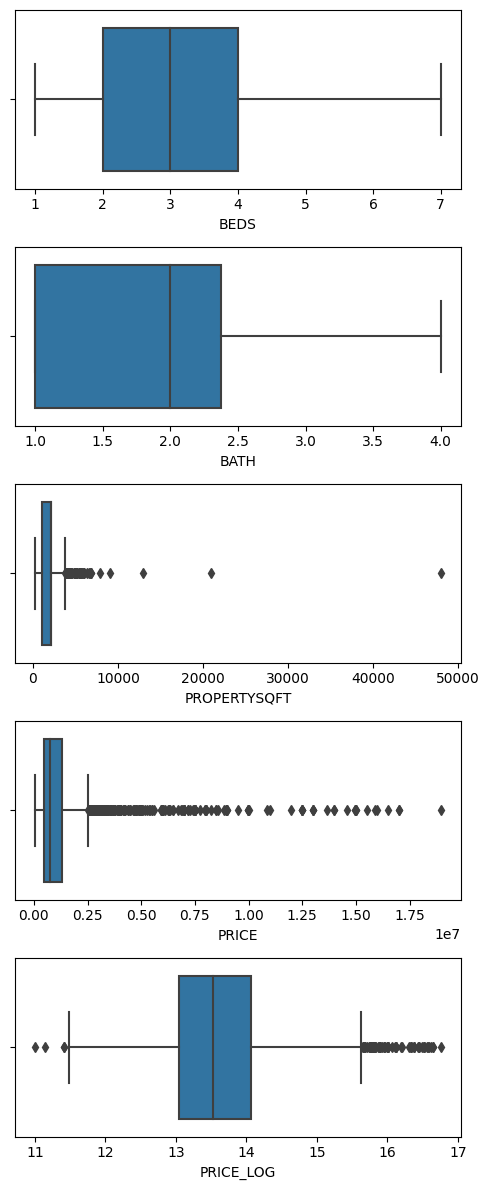

In [70]:
# Dane po usunięciu outlierów
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE", "PRICE_LOG"]]

fig, axes = plt.subplots(5, 1, figsize= (5, 12))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= (df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

<AxesSubplot: >

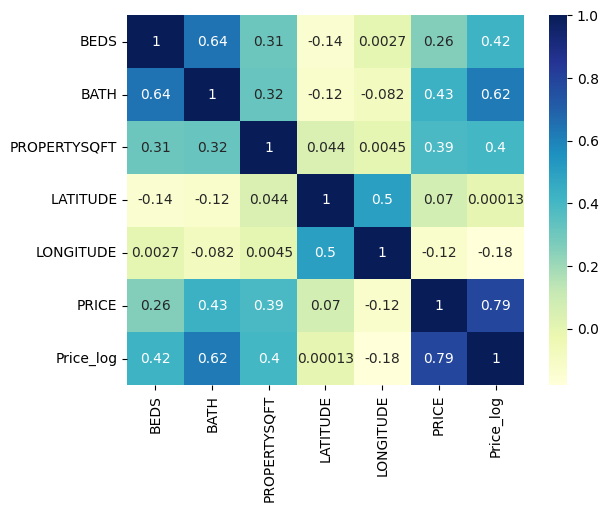

In [ ]:
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")